In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from pathlib import Path

In [4]:
import matplotlib.pyplot as plt

In [5]:
strrev = lambda y: str(''.join([_ for _ in reversed(y)]))

In [6]:
def get_label(dct):
    if float(dct['α']) == 0:
        return '1_OLS'
    elif float(dct['l1r']) == 1:
        return f'2_L1, α={dct["α"]}'
    elif float(dct['l1r']) == 0:
        return f'3_L2, α={dct["α"]}'
    else:
        return f'4_l1r={dct["l1r"]}, α={dct["α"]}'
    return

In [7]:
# file_loc = r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\final_outputs_rev\Figure_3-mse_sctr.csv'

file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-smpl3/Figure_1_2-mse_sctr.csv'
# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds3/Figure_1_2-mse_sctr.csv'
# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps/Figure_1_2-mse_sctr.csv'
# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds/Figure_1_2-mse_sctr.csv'

concat = pd.read_csv(file_loc)
concat['model_version'] = concat['model_version'].str.replace('max_iter10000__fit_interceptFalse__',  '')
concat['model_version'] = concat['model_version'].str.replace('____',  '.')
concat['model_version'] = concat['model_version'].str.replace('alpha','α=')
concat['model_version'] = concat['model_version'].str.replace('l1_ratio','l1r=')
# concat['model_version'] = concat['model_version'].apply(lambda x: ' / '.join(['='.join([_.split('=')[0], strrev(strrev(_.split('=')[1]).zfill(4))]) for _ in x.split('__')]))#.str.zfill(4)
concat['model_version'] = concat['model_version'].str.replace('base_','')
concat['model_version'] = concat['model_version'].str.replace('simple_','')
concat['model_version'] = concat['model_version'].str.replace('words_','')
concat['model_version'] = concat['model_version'].apply(lambda x: ([{_.split('=')[0]: strrev(strrev(_.split('=')[1]).zfill(4))} for _ in x.split('__')]))#.str.zfill(4)
concat['model_version'] = concat['model_version'].apply(lambda x: {k: v for d in x for k, v in d.items()})#.str.zfill(4)

concat['label'] = concat['model_version'].apply(lambda x: get_label(x))
concat = concat.drop('model_version', axis=1)

In [8]:
concat

,mouse_id,channel,name,run_num,mse_tr,mse_cv,mse_te,label
0,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,num=0,0.773617,0.774583,0.777865,"3_L2, α=0.001"
1,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,num=1,0.774857,0.775838,0.776584,"3_L2, α=0.001"
2,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,num=2,0.776475,0.778418,0.774944,"3_L2, α=0.001"
3,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,num=0,0.773617,0.774112,0.777865,"3_L2, α=0.01"
4,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,num=1,0.774857,0.776781,0.776584,"3_L2, α=0.01"
...,...,...,...,...,...,...,...,...
94,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,num=1,0.771533,0.768501,0.775487,"3_L2, α=10.0"
95,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,num=2,0.775697,0.776299,0.771455,"3_L2, α=10.0"
96,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,num=0,0.771129,0.771729,0.775965,"3_L2, α=1.00"
97,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,num=1,0.771510,0.769802,0.775492,"3_L2, α=1.00"


In [9]:
# concat = concat.set_index(['channel', 'name', 'model_version', 'run_num']).drop('mouse_id', axis=1)
concat = concat.set_index(['channel', 'name', 'label', 'run_num']).drop('mouse_id', axis=1)

In [10]:
# vbp['model_version'].apply(lambda x: [[_.split('=')[0], strrev(strrev(_.split('=')[1]).zfill(4))] for _ in x.split('__')])#.str.zfill(4)

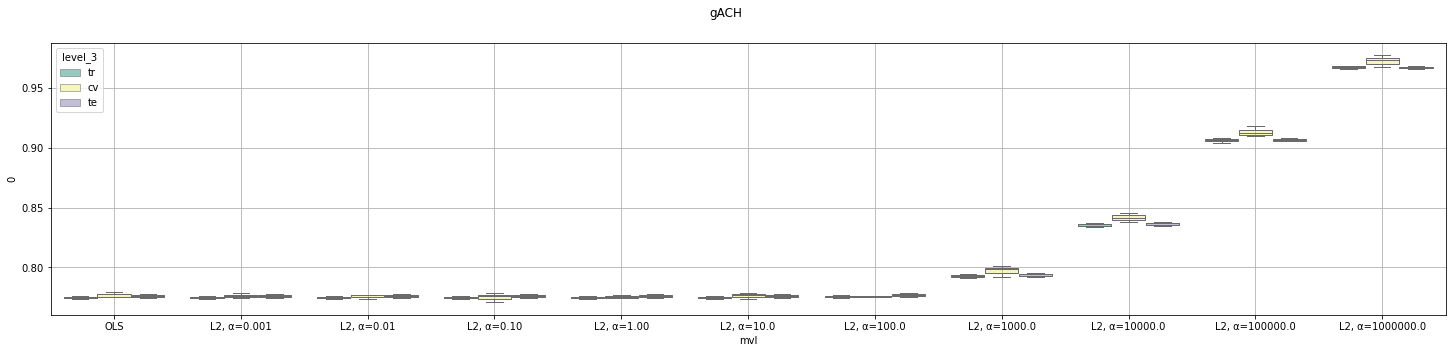

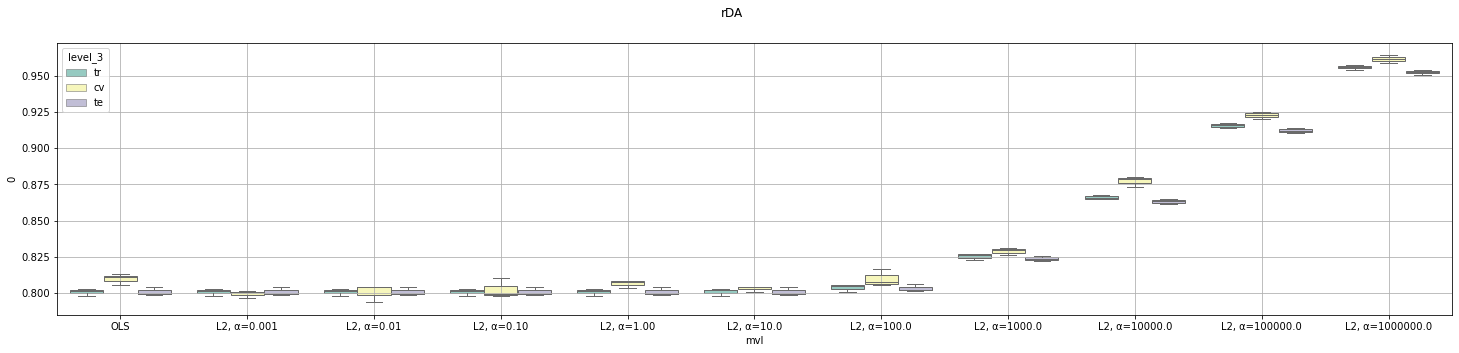

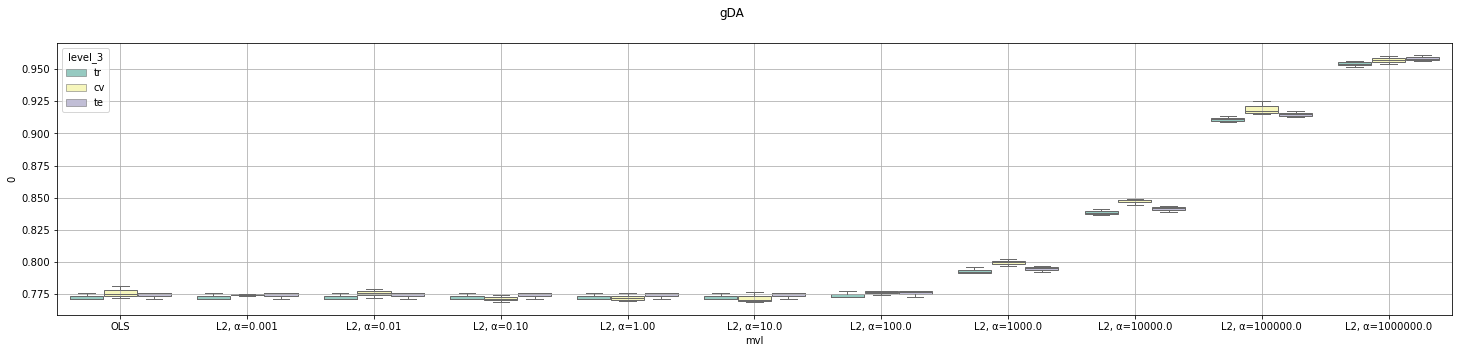

In [11]:
import seaborn as sns
for chl in concat.reset_index()['channel'].unique():
    
    fig, ax = plt.subplots(1,1,figsize=(25,5))
    
    fig.suptitle(chl)
    fig.set_facecolor('w')
    
    vwyc = concat.loc[chl].values
    ymn, ymx = np.min(vwyc), np.max(vwyc)
    
    vbp = concat.loc[chl].rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
    vbp['mvl'] = vbp['label']
#     vbp['mvl'] = vbp['label'] + ' / ' + vbp['level_3']
#     vbp['mvl'] = vbp['level_3'] + ' / ' + vbp['label']
    vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
    vbp = vbp.sort_values(['mvl', 'level_3'])
    
    vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
    vbp['level_3'] = vbp['level_3'].apply(lambda x: x.split('_')[-1])
    
    sns.boxplot(data=vbp, x='mvl', y=0, hue='level_3', palette="Set3", linewidth=1, ax=ax)
    ax.grid(True)
    plt.xticks(rotation=0)